In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
#loading data
data = pd.read_csv('Dummy_coding_data.csv')

In [3]:
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
#Descriptives
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
#There is no descriptive for the attendence IV, meaning it requires dummy coding. 
data_dummy_coded = data.copy()
data_dummy_coded['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [6]:
#Checking that the data are dummy coded now
data_dummy_coded

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
#Attendance variable tracks whether a student attended more than 75% of their classes in the academic year
data_dummy_coded.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


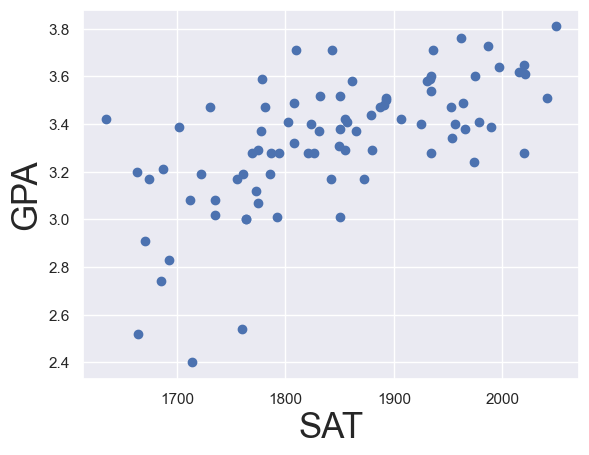

In [8]:
#Visualising the variables, GPA(DV) and SAT(IV)
plt.scatter(data_dummy_coded['SAT'], data_dummy_coded['GPA'])
plt.xlabel('SAT', fontsize = 25)
plt.ylabel('GPA', fontsize = 25)
plt.show()

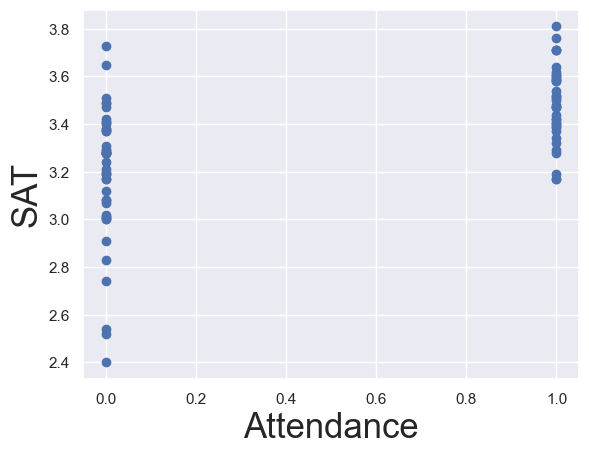

In [9]:
#Visualising the variables
plt.scatter(data_dummy_coded['Attendance'], data_dummy_coded['GPA'])
plt.xlabel('Attendance', fontsize = 25)
plt.ylabel('SAT', fontsize = 25)
plt.show()

In [10]:
#Setting up regression parameters
y = data_dummy_coded['GPA']
x1 = data_dummy_coded[['SAT', 'Attendance']]

In [11]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.19e-15
Time:                        10:14:11   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

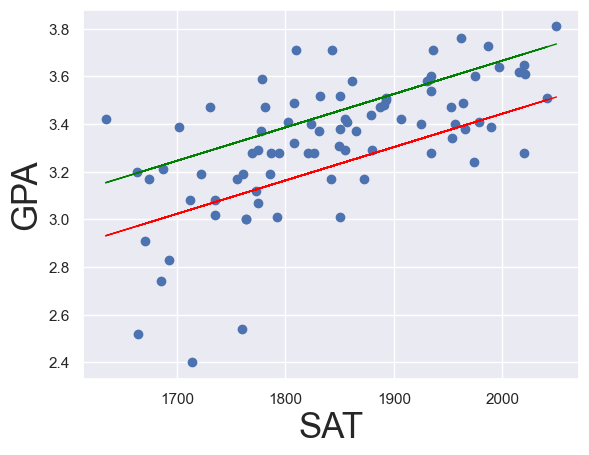

In [12]:
#Visualising the final regression model, showing lines of fit for Yes Attendance (Green) and No Attendance (Red)
plt.scatter(data_dummy_coded['SAT'], y)
yhat_no = 0.6439 + 0.0014*data_dummy_coded['SAT']
yhat_yes = 0.8665 + 0.0014*data_dummy_coded['SAT']
fig = plt.plot(data_dummy_coded['SAT'], yhat_no, lw=1, c= 'red')
fig = plt.plot(data_dummy_coded['SAT'], yhat_yes, lw=1, c= 'green')
plt.xlabel('SAT', fontsize = 25)
plt.ylabel('GPA', fontsize = 25)
plt.show()

In [13]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]}) #add constant, and two participants to predict their scores
new_data = new_data[['const', 'SAT', 'Attendance']] #when making new dataframes, they'll be ordered alphabetically, this re-orders them
new_data = new_data.rename(index={0: 'Bob', 1: 'Alice'}) #Let's also simulate participant names by renaming indicies 
new_data

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [14]:
predictions = results.predict(new_data) #we take new_data as the argument for our prediction 
predictions #now we find their GPAs based on their attendance and SAT scores

Bob      3.023513
Alice    3.204163
dtype: float64

In [15]:
predictions1=pd.DataFrame({'Predicted GPA':predictions}) #create a dataframe for our new predictions
joined = new_data.join(predictions1) 
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predicted GPA
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [24]:
#finally, we see that Bob's higher SAT is negated by his lack of >75% attendance. 
#let's get standardised beta coefficients for the regression predictors to see which of SAT or Attendance is the stronger predictor
#this will give us clarity on the model in the future

#first, let's standardise the dataframe
data_dummy_coded_z = data_dummy_coded.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [21]:
#check that the dataframe has executed properly - scores are now standardised (z-distributed)
data_dummy_coded_z

,SAT,GPA,Attendance
0,-1.263383,-3.445384,-0.930949
1,-1.744584,-3.000932,-0.930949
2,-0.820678,-2.926857,-0.930949
3,-1.542480,-2.186104,-0.930949
4,-1.465487,-1.852765,-0.930949
...,...,...,...
79,0.873151,1.406549,1.074172
80,-0.339476,1.406549,1.074172
81,1.363977,1.480624,-0.930949
82,1.123376,1.591737,1.074172


In [22]:
#setting up the variables from new dataframe
y_z = data_dummy_coded_z['GPA']
x1_z = data_dummy_coded_z[['SAT', 'Attendance']]

In [23]:
x_z = sm.add_constant(x1_z)
results = sm.OLS(y_z,x_z).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.19e-15
Time:                        10:18:04   Log-Likelihood:                -84.187
No. Observations:                  84   AIC:                             174.4
Df Residuals:                      81   BIC:                             181.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.073          0      1.000      -0.146       0.146
SAT            0.5387      0.075      7.141      0.000       0.389       0.689
Attendance     0.4113      0.075      5.451      0.000       0.261       0.561
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Looking at the now standardised coefficients shows that SAT is a stronger predictor than Attendance, but not by a lot. 
#This helps further explain Bob's and Alice's scores from earlier.